## Problem Statement 9
### Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps: 
    a. Load in a pre-trained CNN model trained on a large dataset 
    b. Freeze parameters (weights) in model's lower convolutional layers 
    c. Add custom classifier with several layers of trainable parameters to model 
    d. Train classifier layers on training data available for task
    e. Fine-tune hyper parameters and unfreeze more layers as needed

### Import required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
# from keras.losses import SparseCategoricalCrossentropy
# from keras.metrics import Accuracy
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    validation_split=0.3
)

In [4]:
root_dir = "C:/Users/Pranav/OneDrive/Desktop/Final_Practical/LP-IV-datasets/LP-IV-datasets/LP-IV-datasets/Object_Detection(Ass6)/caltech-101-img"

img_generator_flow_train = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle =True,
    subset = "training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    subset = "validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


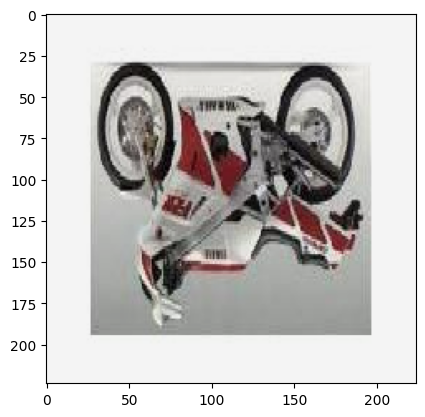

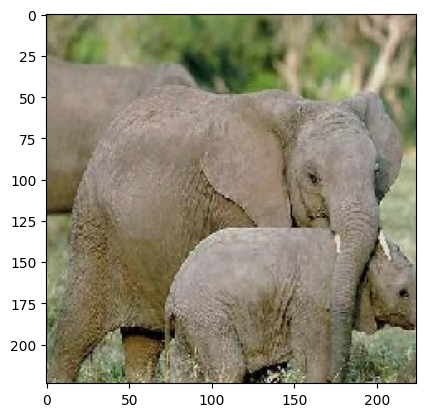

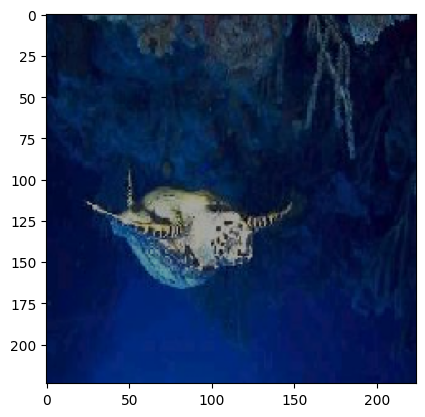

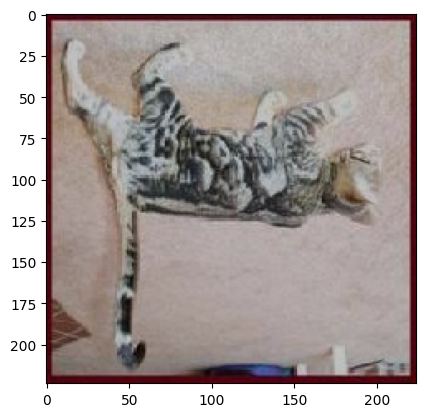

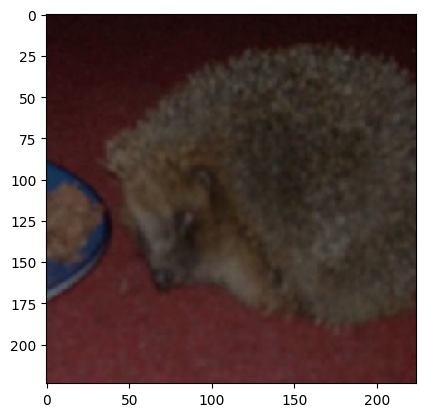

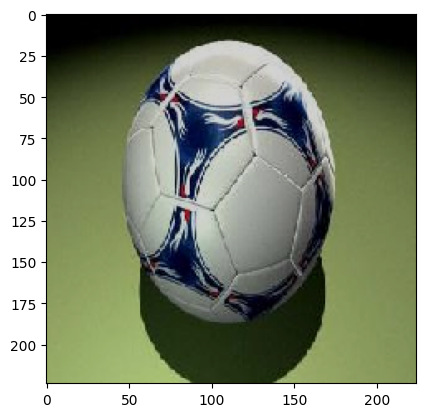

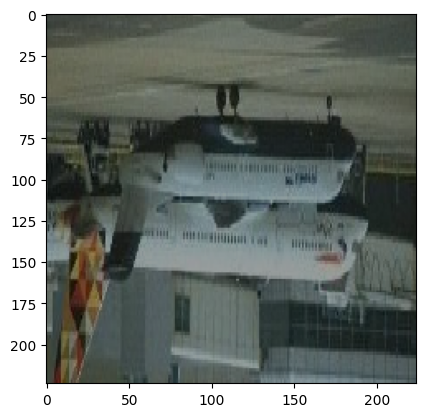

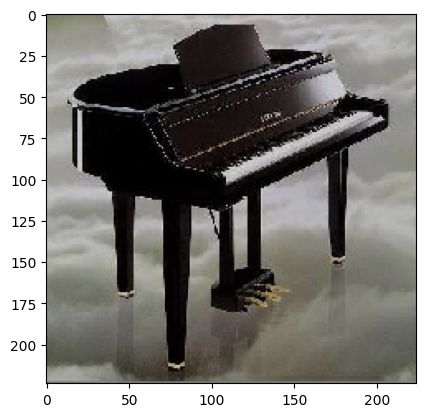

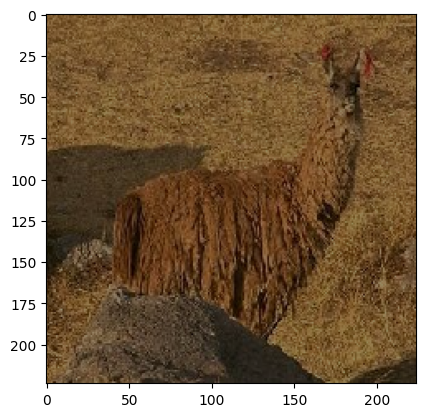

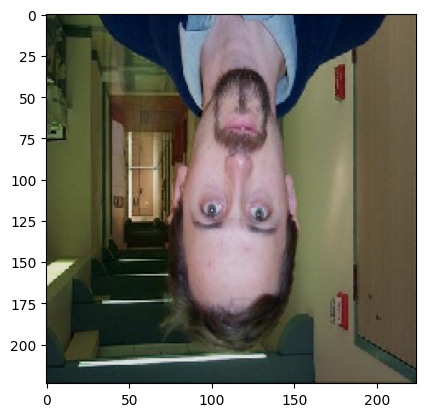

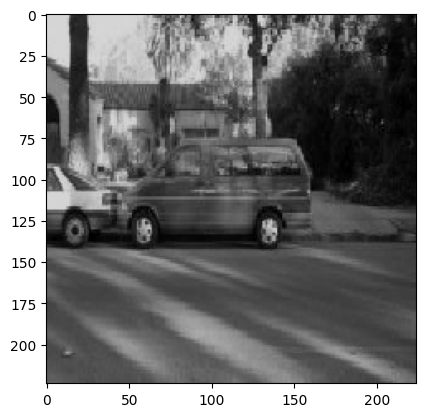

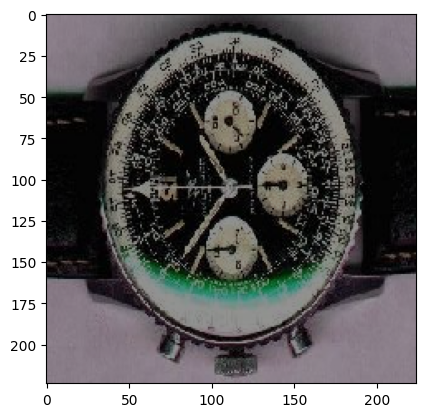

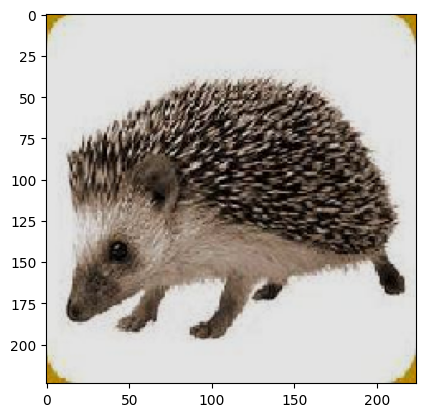

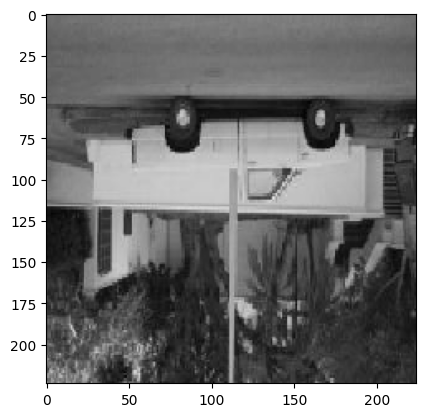

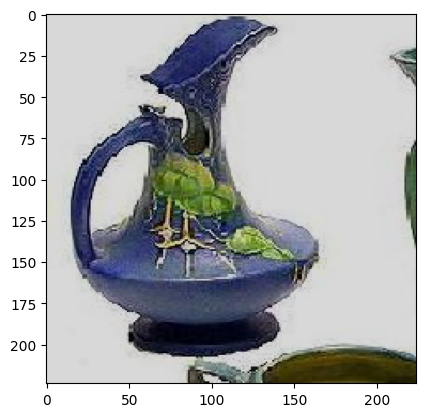

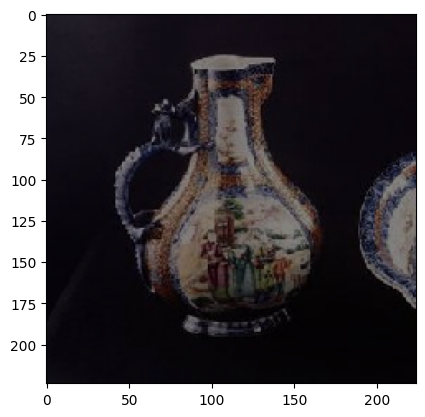

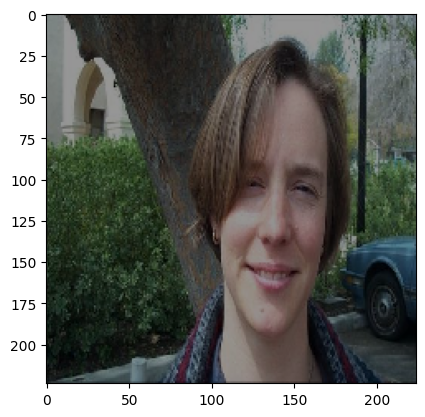

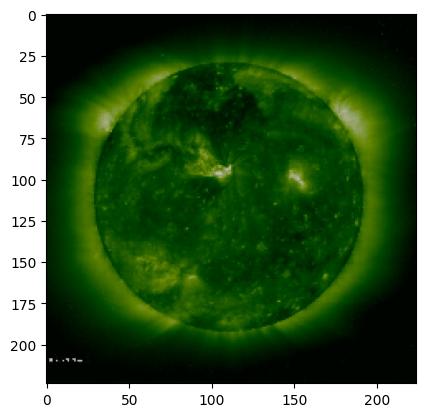

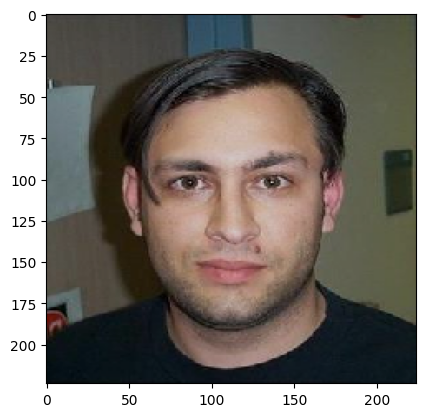

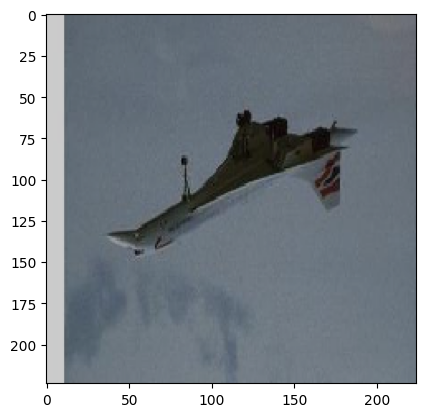

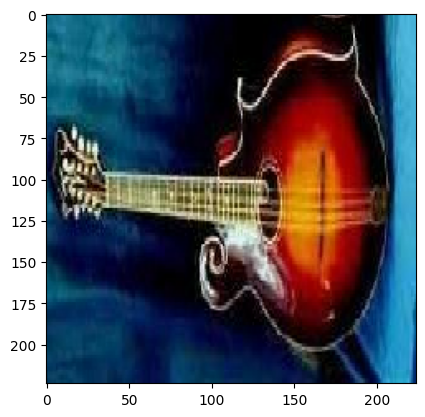

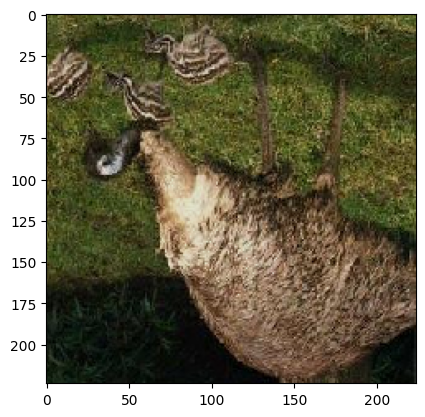

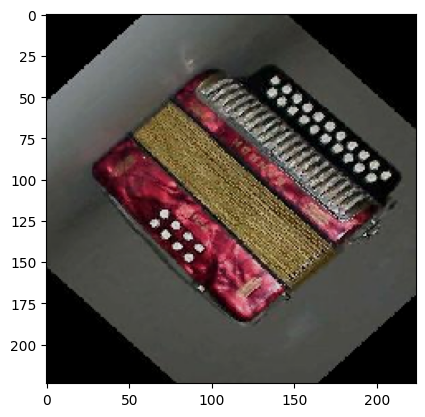

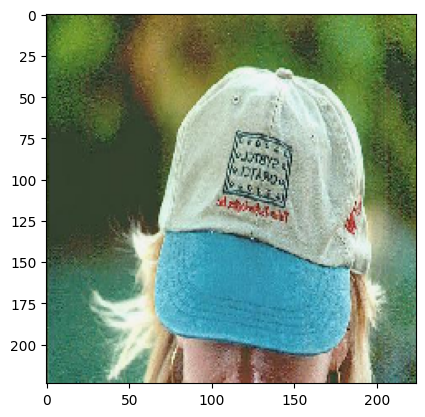

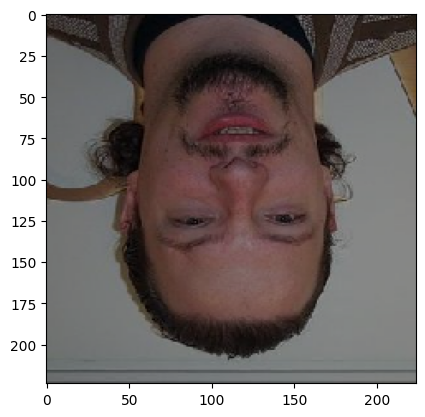

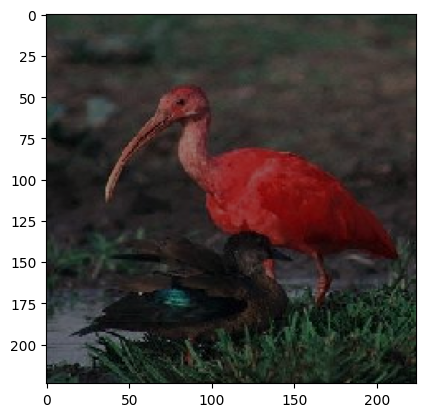

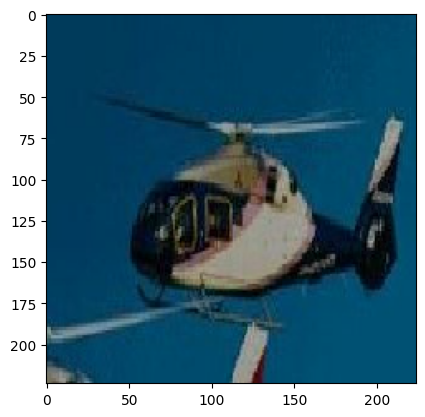

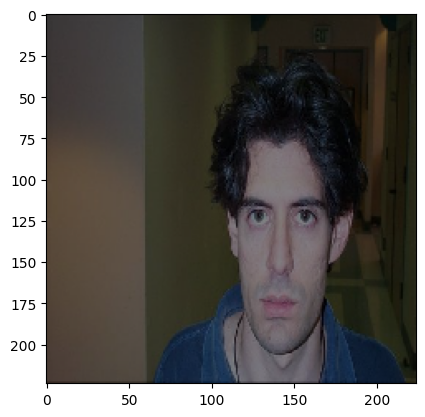

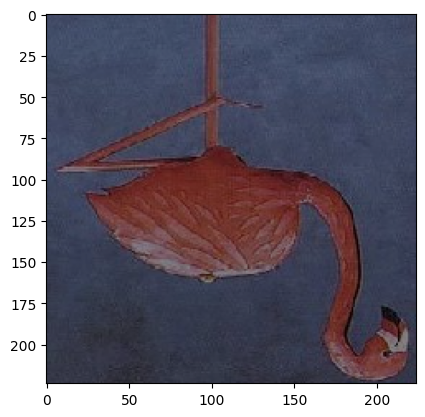

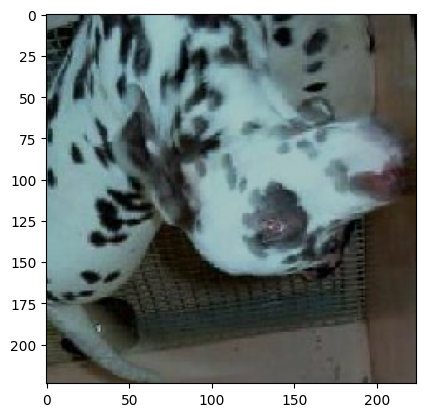

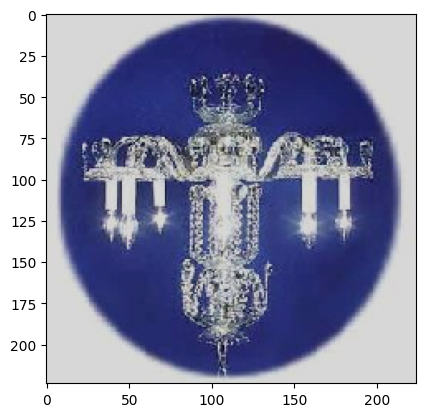

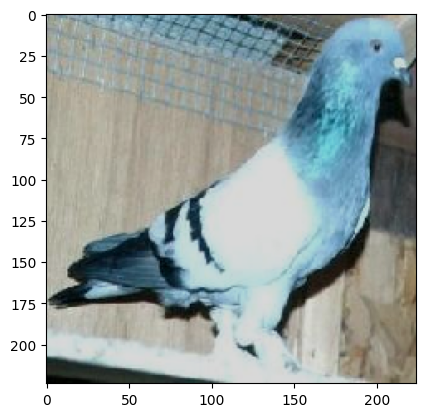

In [5]:
imgs, labels = next(iter(img_generator_flow_train))
for img, labels in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

## a. Loading pre-trained model

In [ ]:
model_path = "C:/Users/Pranav/OneDrive/Desktop/Final_Practical/LP-IV-datasets/LP-IV-datasets/LP-IV-datasets/Object_Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(input_shape=(224, 224, 3),include_top = False, weights = model_path)

## b. Freeze parameters

In [7]:
base_model.trainable = False

## c. Add custom classifier with several layers of trainable parameteres to model

In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       470,118 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,184,806 (57.93 MB)

 Trainable params: 470,118 (1.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## d. Train classifier layers on training data available for task

In [10]:
adam = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5,
          epochs = 3)

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 224s 55s/step - accuracy: 0.1089 - loss: 5.0613 - val_accuracy: 0.1907 - val_loss: 4.3286
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 225s 56s/step - accuracy: 0.1997 - loss: 3.9764 - val_accuracy: 0.2426 - val_loss: 3.9372
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 268s 66s/step - accuracy: 0.2944 - loss: 3.6727 - val_accuracy: 0.3326 - val_loss: 3.4740


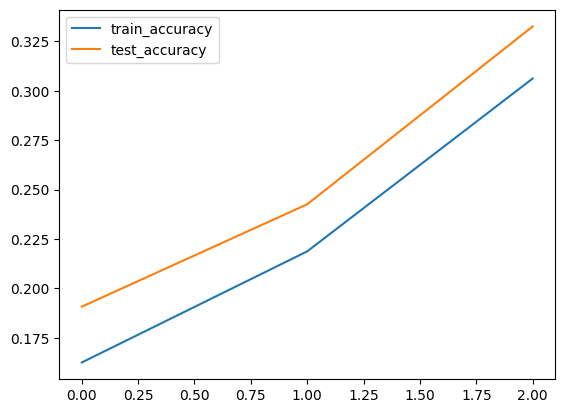

In [13]:
plt.plot(model.history.history['accuracy'], label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()

# Fine-tune hyper parameters and unfreeze more layers

In [14]:
base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [15]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=2, 
          epochs=3)

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - categorical_accuracy: 0.2500 - loss: 70.4481

KeyboardInterrupt: 